In [1]:
import sys
sys.path.append('../')

import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

2 Physical GPUs, 2 Logical GPUs


In [2]:
tf.__version__

'2.1.0'

In [3]:
graphgallery.__version__

'0.2.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets", verbose=False)
adj, x, labels = data.graph.unpack()
idx_train, idx_val, idx_test = data.split()


Downloaded dataset files have existed.
Processing...
Processing completed.


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

# ClusterGCN model
+ adj: Scipy sparse matrix
+ x: Numpy array-like matrix
+ labels: Numpy array
+ device: can be "CPU" or "GPU"
+ norm_x: `l1` for row-wise normalize for input `x`
+ n_clusters: he number of clusters that the graph being seperated, if not specified (`None`), 
    it will be set to the number of classes automatically. (default :obj: `None`).


There will be a tensorflow error: ValueError: Unable to create group (name already exists), and it is fixed in tensorflow version >=2.2,
so use `train_v1` instead.

In [6]:
from graphgallery.nn.models import ClusterGCN
model = ClusterGCN(adj, x, labels, device='GPU', n_clusters=10, seed=123)
model.build()
# train with validation
his = model.train_v1(idx_train, idx_val, verbose=1, epochs=50)
# train without validation
# his = model.train_v1(idx_train, verbose=1, epochs=100)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


loss 0.01, acc 100.00%, val_loss 2.05, val_acc 76.60%: 100%|██████████| 50/50 [00:03<00:00, 25.97it/s]


Test loss 1.1144, Test accuracy 82.90%


## Show model summary

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attributes (InputLayer)         [(None, 1433)]       0                                            
__________________________________________________________________________________________________
edge_index (InputLayer)         [(None, 2)]          0                                            
__________________________________________________________________________________________________
edge_weight (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
dropout (Dropout)               (None, 1433)         0           attributes[0][0]                 
______________________________________________________________________________________________

## Show parameters 

In [8]:
# show training parameters
model.show('train')

+-------------------+-----------------------------------+
|    Parameters     |               Value               |
+===================+===================================+
| Name              | ClusterGCN                        |
+-------------------+-----------------------------------+
| as_model          | False                             |
+-------------------+-----------------------------------+
| early_stop_metric | val_loss                          |
+-------------------+-----------------------------------+
| early_stopping    | None                              |
+-------------------+-----------------------------------+
| epochs            | 50                                |
+-------------------+-----------------------------------+
| monitor           | val_acc                           |
+-------------------+-----------------------------------+
| save_best         | True                              |
+-------------------+-----------------------------------+
| verbose     

In [9]:
# show model parameters
model.show('model')

+-------------+------------+
| Parameters  |   Value    |
+=============+============+
| Name        | ClusterGCN |
+-------------+------------+
| activations | ['relu']   |
+-------------+------------+
| dropouts    | [0.5]      |
+-------------+------------+
| hiddens     | [32]       |
+-------------+------------+
| l2_norms    | [1e-05]    |
+-------------+------------+
| lr          | 0.010      |
+-------------+------------+
| use_bias    | False      |
+-------------+------------+


In [10]:
# By defaule, show all
model.show()

+-------------------+-----------------------------------+
|    Parameters     |               Value               |
+===================+===================================+
| Name              | ClusterGCN                        |
+-------------------+-----------------------------------+
| activations       | ['relu']                          |
+-------------------+-----------------------------------+
| as_model          | False                             |
+-------------------+-----------------------------------+
| device            | GPU                               |
+-------------------+-----------------------------------+
| dropouts          | [0.5]                             |
+-------------------+-----------------------------------+
| early_stop_metric | val_loss                          |
+-------------------+-----------------------------------+
| early_stopping    | None                              |
+-------------------+-----------------------------------+
| epochs      

## Visualization Training 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


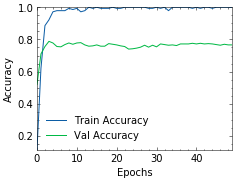

In [11]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['acc'])
    plt.plot(his.history['val_acc'])
    plt.legend(['Train Accuracy', 'Val Accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    

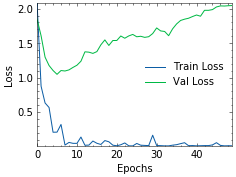

In [12]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['loss'])
    plt.plot(his.history['val_loss'])
    plt.legend(['Train Loss', 'Val Loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    